In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
from brownian import brownian

In [3]:
# Function parameters

# The number of dimensions of the space.
d = 2
# The Wiener process parameter.
delta = 10
# Total time.
T = 50.0
# Number of steps.
N = 100
# Number of realizations to generate.
m = 50
# Set the image resolution.
nx, ny = 558, 572

# Variables

# Time step size
dt = T / N
# Create an empty array to store the realizations.
W = np.empty((d, m, N + 1))
# Initial values of x.
W[..., 0] = 0
# Set an array for time steps
t = np.linspace(0, N * dt, N + 1)
# Create a square grid
X, Y = np.arange(0, nx), np.arange(0, ny)

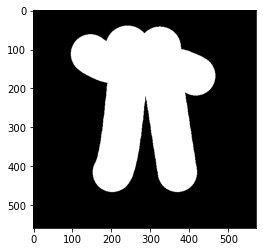

In [4]:
piHeat = plt.imread('piHeat.png')
piGray = piHeat[..., 0].copy()
cold = piGray < 1 / 2
piGray[cold] = 0
piGray[~cold] = 1
plt.imshow(piGray, cmap='gray')

In [5]:
inx, iny = piGray.shape
h = lambda x, y: piGray[np.minimum(inx - 1, np.maximum(0, (inx / nx * np.asarray(x)).astype(np.uint16))), np.minimum(iny - 1, np.maximum(0, (iny / ny * np.asarray(y)).astype(np.uint16)))]

In [6]:
monte_carlo = np.empty((ny, nx, N+1))
for ix in range(nx):
    x = X[ix]
    for iy in range(ny):
        y = Y[iy]
        brownian(W[...,0], N, dt, delta, out=W[...,1:])
        monte_carlo[iy, ix, :] = np.mean(h(x + W[0], y + W[1]), axis=0)

In [7]:
for t in (0, 1, 3, 10, 30, 100):
    plt.figure()
    plt.imshow(monte_carlo[..., t].T, vmin=-0.7, vmax=1.7, cmap="coolwarm")
    plt.tight_layout()
    plt.savefig(f'images/fk/t-{t}.png', bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()

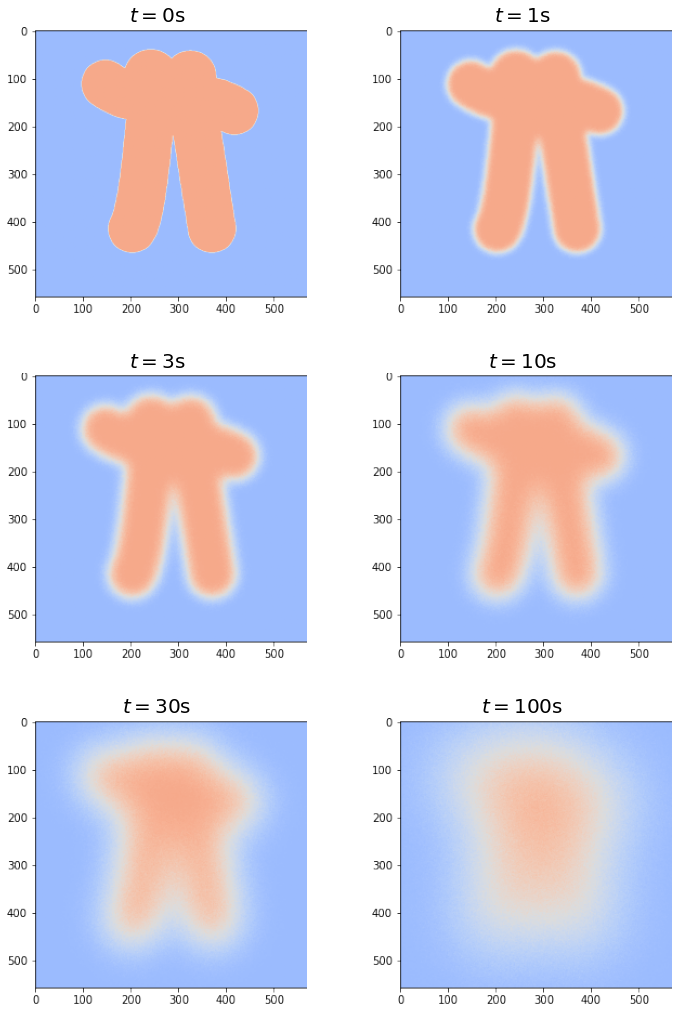

In [8]:
c1 = plt.imread(f"images/fk/t-0.png")
c2 = plt.imread(f"images/fk/t-1.png")
c3 = plt.imread(f"images/fk/t-3.png")
c4 = plt.imread(f"images/fk/t-10.png")
c5 = plt.imread(f"images/fk/t-30.png")
c6 = plt.imread(f"images/fk/t-100.png")

fig, ax = plt.subplots(3, 2, figsize=(12,18))
fst=20

ax[0, 0].axis("off")
ax[0, 0].imshow(c1)
ax[0, 0].set_title("$t = 0$s", fontsize=fst)

ax[0, 1].axis("off")
ax[0, 1].imshow(c2)
ax[0, 1].set_title("$t = 1$s", fontsize=fst)

ax[1, 0].axis("off")
ax[1, 0].imshow(c3)
ax[1, 0].set_title("$t = 3$s", fontsize=fst)

ax[1, 1].axis("off")
ax[1, 1].imshow(c4)
ax[1, 1].set_title("$t = 10$s", fontsize=fst)

ax[2, 0].axis("off")
ax[2, 0].imshow(c5)
ax[2, 0].set_title("$t = 30$s", fontsize=fst)

ax[2, 1].axis("off")
ax[2, 1].imshow(c6)
ax[2, 1].set_title("$t = 100$s", fontsize=fst)

fig.savefig(f"piFkExample.png", transparent=True, bbox_inches='tight')
plt.show()